<a href="https://colab.research.google.com/github/frederikvanduuren/Mentor/blob/master/Fred_Assignment_1A_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolution Kernels

## Introduction

**Convolution image processing technique is commonly used to create image filters that change the intensities of a pixel to reflect the intensities of the surrounding pixels. This operation is performed using a grid-like mathematical construct (3x3 used now as a standard) called a kernel. The numbers inside these kernels determine how to transform the pixels from the original image into the pixels of the processed image. It operates by sliding the kernels over the entire image, stopping at each potential location and transforming the pixels underneath via a weighted-sum tensor product, as shown below**: 

![Convolution](https://cdn-images-1.medium.com/max/1600/0*QS1ArBEUJjjySXhE.png)

**Let's view few examples of these kernels:**

## Provide your Image URL and Display it!

In [0]:
#Provide the url here
url1a = 'http://www.san-francisco-travel-secrets.com/images/golden-gate-bridge-night-view-500.jpg'
url1b = 'https://www.woodwayproducts.com/images/categories/latticegardendiagonalcedarclear.jpg'
url2 = 'https://img2.goodfon.com/wallpaper/big/8/9b/gorod-ssha-niu-iork-doma-bruklinskii-most.jpg'

### Download the image, convert it to a NumPy array, and then read it into OpenCV format

In [0]:
#Import necessary libraries
import numpy as np
from urllib.request import urlopen
import cv2
from matplotlib import pyplot as plt

def url_to_image(url):
  resp = urlopen(url)
  image = np.asarray(bytearray(resp.read()), dtype="uint8")
  image = cv2.imdecode(image, cv2.IMREAD_COLOR)
  
  return image

#Get the image file
image1a = url_to_image(url1a)
image1b = url_to_image(url1b)
image2 = url_to_image(url2)

### Display the Actual Images

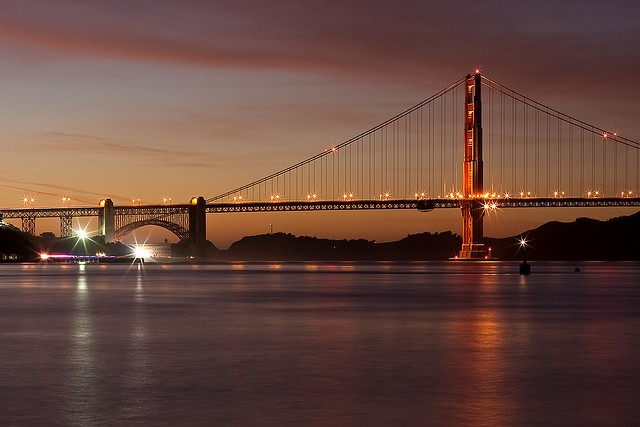

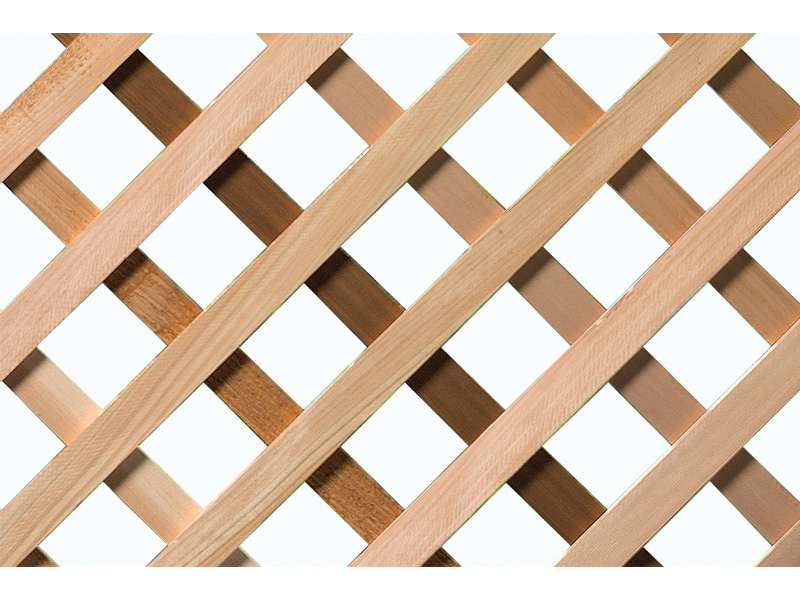

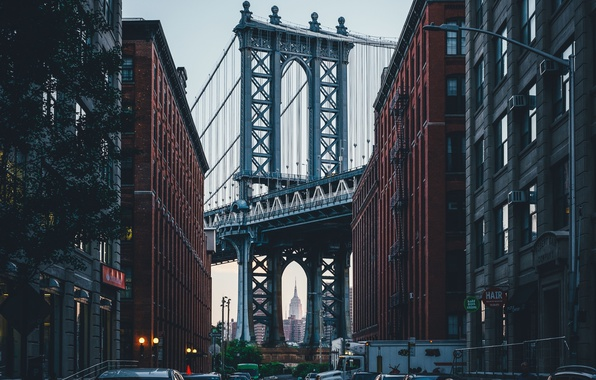

In [0]:
# Import necessary libraries
from google.colab.patches import cv2_imshow

#display the images
cv2_imshow(image1a)
cv2_imshow(image1b)
cv2_imshow(image2)

## 1. Edge Detection Kernels

[Sobel Operator](https://en.wikipedia.org/wiki/Sobel_operator#Formulation) is the most widely used edge detection technique.  Technically, it's a discrete differentiation operator, computing an approximation of the gradient of the image intensity function. The kernel matrix contains negative numbers on one side of columns/rows, positive numbers on other side of columns/rows and zeros in between. Using this gradient format of matrix , we try to find the regions in the image where we have a sharp change in intensity or a sharp change in color.  

### Verical edge detection

In [0]:
#define the kernel
kernel = np.float32([
    [-1,0,1],
    [-2,0,2],
    [-1,0,1]])

#Apply the kernel on the image
prc_image = cv2.filter2D(image1a,-1,kernel)

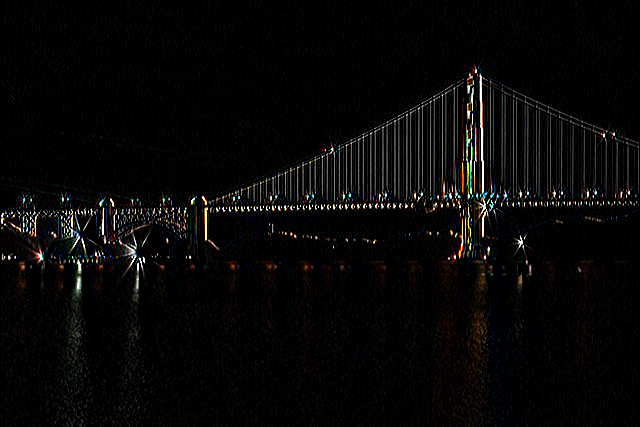

In [0]:
#display the processed image
cv2_imshow(prc_image)

**Comment:** The vertical edges of bridge are clearly distinguishable than the rest.

### Horizontal edge detection

In [0]:
#define the kernel
kernel = np.float32([
    [ 1, 2, 1],
    [ 0, 0, 0],
    [-1,-2,-1]])

#Apply the kernel on the image
prc_image = cv2.filter2D(image1a,-1,kernel)

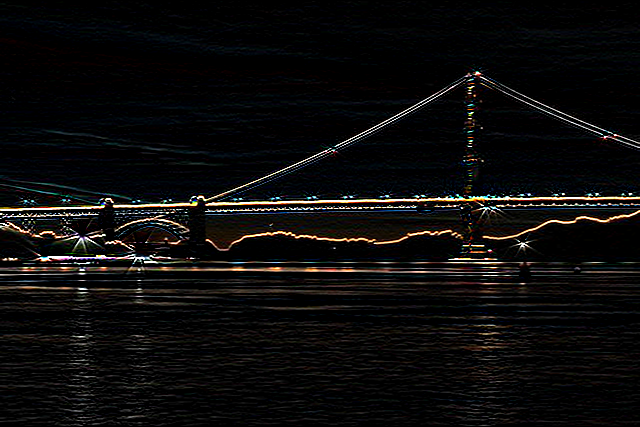

In [0]:
#display the processed image
cv2_imshow(prc_image)

**Comment:** In contrast to vertical edges, here the horizontal edges of bridge and the background mountain tops are clearly distinguishable than the rest.

### Diagonal edge detection (45 degree)

In [0]:
#define the kernel
kernel = np.float32([
    [-2,-1, 0],
    [-1, 0, 1],
    [ 0, 1, 2]])

#Apply the kernel on the image
prc_image = cv2.filter2D(image1b,-1,kernel)

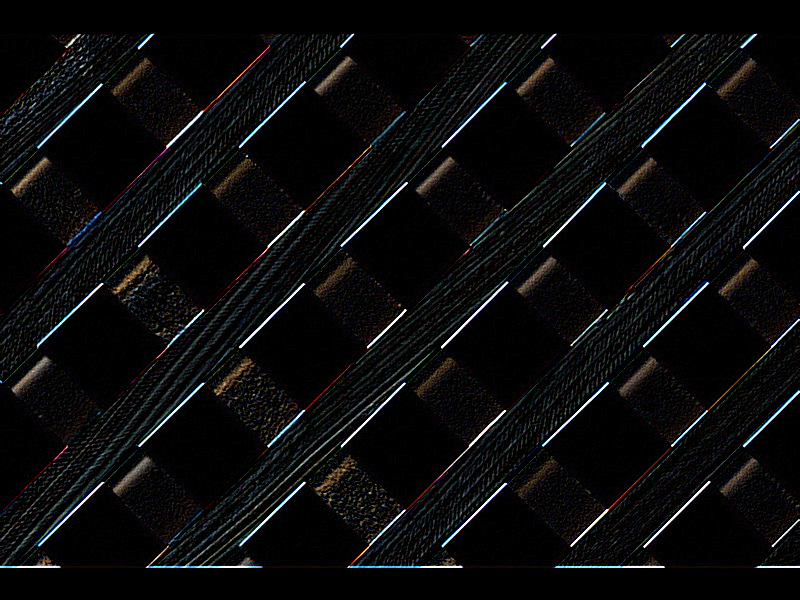

In [0]:
#display the processed image
cv2_imshow(prc_image)

**Comment:** The diagonal edges of 45 degrees are clearly distinguishable than the 135 degree diagonal.

### Diagonal edge detection (135 degree)

In [0]:
#define the kernel
kernel = np.float32([
    [ 0, 1, 2],
    [-1, 0, 1],
    [-2,-1, 0]])

#Apply the kernel on the image
prc_image = cv2.filter2D(image1b,-1,kernel)

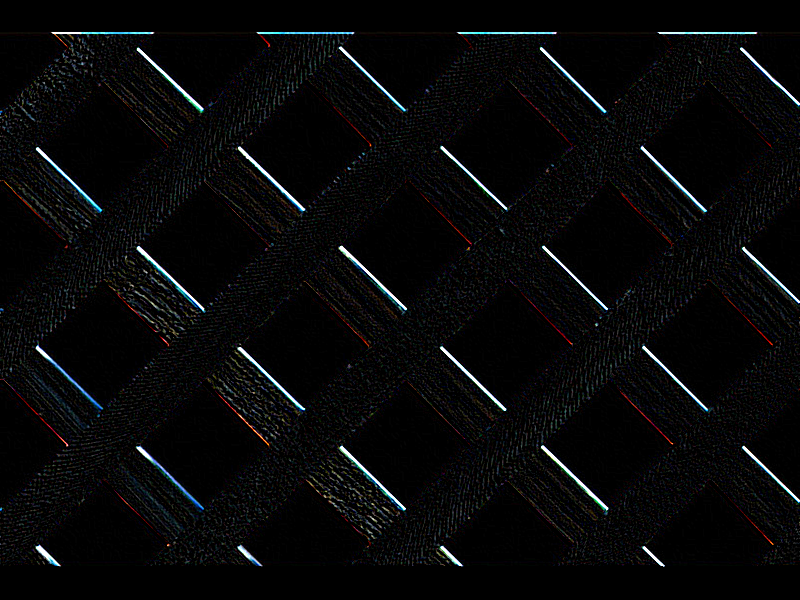

In [0]:
#display the processed image
cv2_imshow(prc_image)

**Comment:** In contrast to above, the diagonal edges of 135 degrees are clearly distinguishable than the 45 degree diagonal.

**Note : Here on, we will have sum of numbers in a kernel matrix equal to 1 so that we can maintain the same brightness of the image for correct comaprision.**

## 2. Identity Kernel

It's an identity mapping of the raw image.

In [0]:
#define the kernel
kernel = np.float32([
    [0,0,0],
    [0,1,0],
    [0,0,0]])

#Apply the kernel on the image
prc_image = cv2.filter2D(image2,-1,kernel)

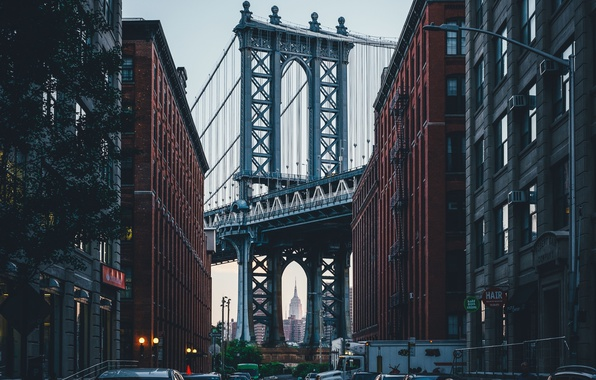

In [0]:
#display the processed image
cv2_imshow(prc_image)

**Comment:** It looks exactly identical.

## 3. Blur Kernels

### Gaussian Blur

[Gaussian blur](https://en.wikipedia.org/wiki/Gaussian_blur) is the result of blurring an image by a Gaussian function. Technically, it's a two-dimensional [Weierstrass transform](https://en.wikipedia.org/wiki/Weierstrass_transform) (Fourier transform of a Gaussian). The kernel matrix has the largest value at its center element, decreasing symmetrically as distance from the center increases. The visual effect of this blurring technique is a smooth blur resembling that of viewing the image through a translucent screen, due to which this technique is also known as Gaussian smoothing. When converting the Gaussian’s continuous values into the discrete values needed for a kernel matrix, the sum of the values will be different from 1. This will cause a darkening or brightening of the image. To remedy this, the values are normalized by dividing each term in the kernel by the sum of all terms in the kernel.

In [0]:
#define the kernel
kernel = (1./16) * np.float32([
    [ 1, 2, 1],
    [ 2, 4, 2],
    [ 1, 2, 1]])

#Apply the kernel on the image
prc_image = cv2.filter2D(image2,-1,kernel)

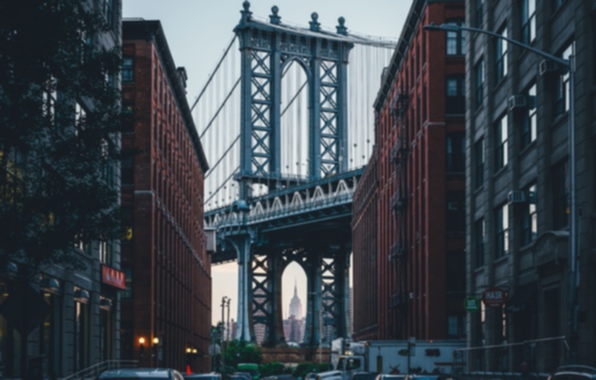

In [0]:
#display the processed image
cv2_imshow(prc_image)

**Comment:** Although its a blurred image of above, we can observe the smoothness all around the image.

### Box Blur

[Box blur]() is used as a approximation to a Gaussian blur. It's a spatial domain linear filter in which each pixel in the resulting image has a value equal to the average value of its neighboring pixels in the input image. The kernel matrix is simply the average of every pixel. The visual effect of this blurring technique is the [bokeh effect](https://en.wikipedia.org/wiki/Bokeh) resembling that of viewing the image through an out-of-focus lens.

In [0]:
#define the kernel
kernel = (1./9) * np.float32([
    [ 1, 1, 1],
    [ 1, 1, 1],
    [ 1, 1, 1]])

#Apply the kernel on the image
prc_image = cv2.filter2D(image2,-1,kernel)

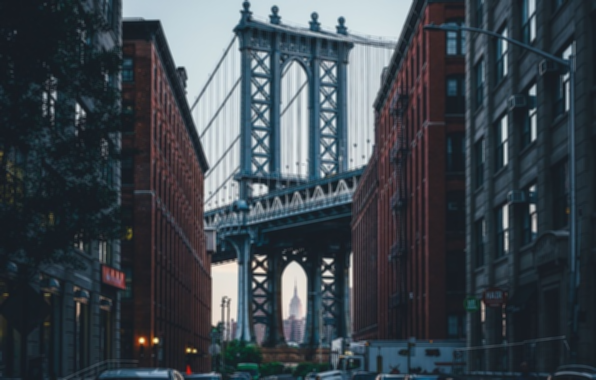

In [0]:
#display the processed image
cv2_imshow(prc_image)

**Comment:** Comapred to Gaussian blur, this one looks more blurred. Observe the much blurred street lamps at bottom left hand side. 

## 4. Sharpen Kernels

Unlike blurring, sharpening does the opposite and tries to pop out the details in the image. Technically, it's a Laplacian of a Gaussian. Thus while building its matrix kernel, we consider the logic of making each pixel value different than its neighbours. So the kernel matrix has the only positive value at its center, rest being equally negative as we move away from the centre.

### Gaussian Sharpen approx. 1

In [0]:
#define the kernel
kernel = np.float32([
    [ 0,-1, 0],
    [-1, 5,-1],
    [ 0,-1, 0]])

#Apply the kernel on the image
prc_image = cv2.filter2D(image2,-1,kernel)

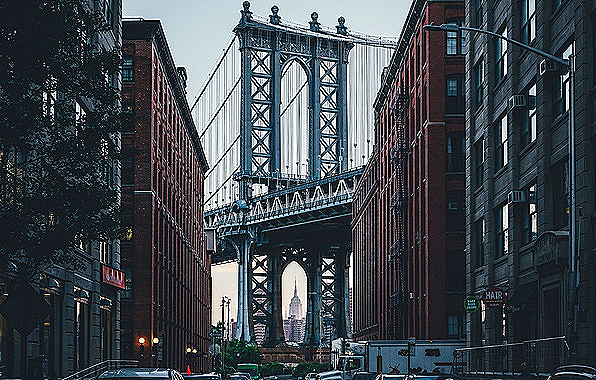

In [0]:
#display the processed image
cv2_imshow(prc_image)

**Comment:** This pops out every edge in the image. 



### Gaussian Sharpen approx. 2 (Opposite to Box Blur technique)

In [0]:
#define the kernel
kernel = np.float32([
    [-1,-1,-1],
    [-1, 9,-1],
    [-1,-1,-1]])

#Apply the kernel on the image
prc_image = cv2.filter2D(image2,-1,kernel)

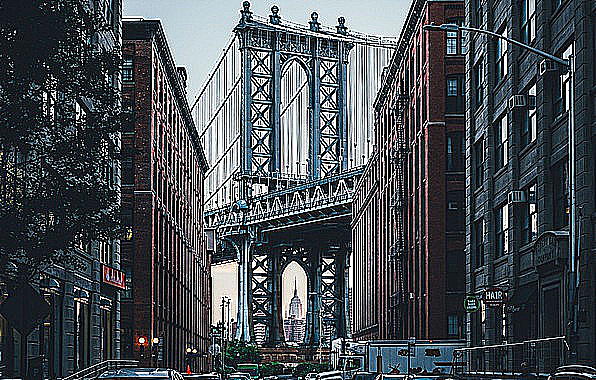

In [0]:
#display the processed image
cv2_imshow(prc_image)

**Comment:** This seems as the kernel excoriated the skin of the image.


**Thank you for going over the Notebook.**